In [1]:
from mpl_toolkits import mplot3d

In [2]:
import os
os.chdir("../..")

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from fix_data import add_label_T
import sklearn.feature_selection as fs
from sklearn.decomposition import PCA, KernelPCA
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.manifold import MDS, Isomap, TSNE, LocallyLinearEmbedding

In [4]:

hcc_smarts_df_train = pd.read_csv("data/SmartSeq/HCC1806_SmartS_Filtered_Normalised_3000_Data_train.txt", sep = " ")
mcf_smarts_df_train = pd.read_csv("data/SmartSeq/MCF7_SmartS_Filtered_Normalised_3000_Data_train.txt", sep= " ")

hcc_smarts_df_train = add_label_T(hcc_smarts_df_train)
mcf_smarts_df_train = add_label_T(mcf_smarts_df_train)

X1 = hcc_smarts_df_train.loc[:,hcc_smarts_df_train.columns!='label']
X2 = mcf_smarts_df_train.loc[:,mcf_smarts_df_train.columns!='label']
y = hcc_smarts_df_train["label"]

0.5940891347340409


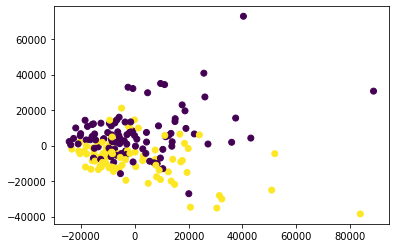

In [6]:
pca = PCA(n_components=3)
pca.fit(X1)

print(sum(pca.explained_variance_ratio_))
red_X1 = pd.DataFrame(pca.transform(X1))
plt.scatter(red_X1[0], red_X1[1], c=y)

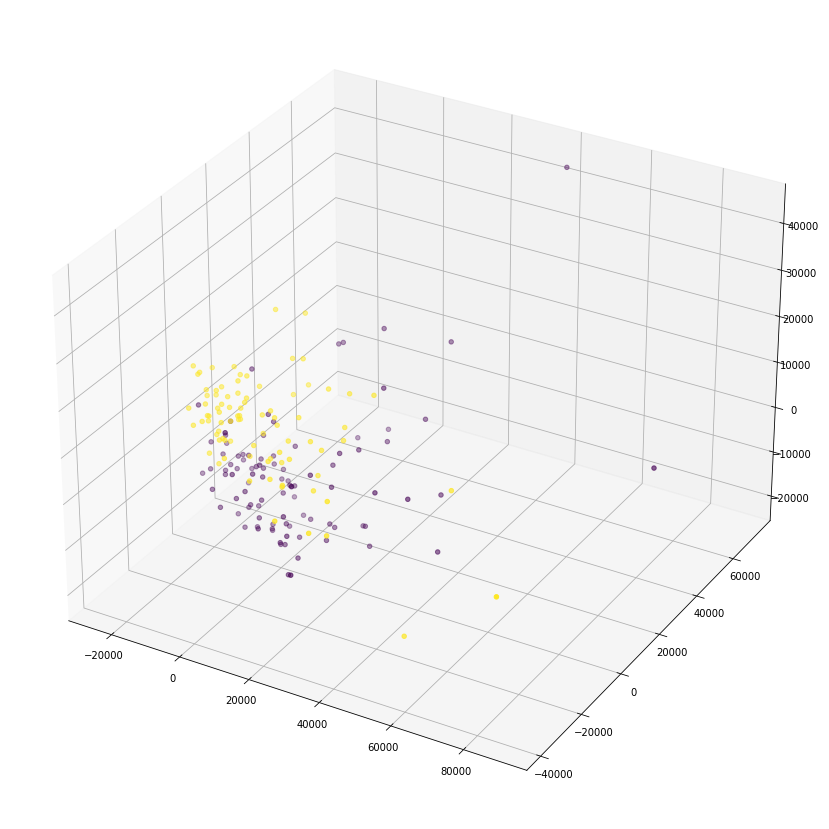

In [7]:
fig = plt.figure(figsize=(15, 15))
 
# syntax for 3-D projection
ax = plt.axes(projection ='3d')
ax.scatter(red_X1[0], red_X1[1],red_X1[2], c=y)

In [8]:
import umap

c:\Users\Samuele\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Samuele\AppData\Local\Programs\Python\Python39\lib\site-packages\umap\distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
c:\Users\Samuele\AppData\Local\Programs\Python\Pyt

In [9]:
reducer = umap.UMAP()
embedding = reducer.fit_transform(X1)

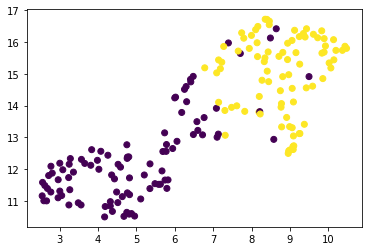

In [11]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=y)

plt.show()